In [37]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.resnet import ResNet50
from keras.applications.resnet import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras import optimizers
import tensorflow as tf
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from datetime import datetime
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
import datetime, os
from tqdm import tqdm 
import cv2

In [38]:
IMAGE_SIZE = [224, 224]
# batch_size = 32
batch_size = 32
numOfEpochs = 100
# optimizer = tf.keras.optimizers.Adam()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.07)
# optimizer = tf.keras.optimizers.RMSprop()

In [39]:
#Give dataset path
# train_path = r'C:\Users\BS579\Desktop\UNet-TF-new\Classification-Dataset - Augmented\train'
# test_path = r'C:\Users\BS579\Desktop\UNet-TF-new\Classification-Dataset - Augmented\test'
# validation_path = r'C:\Users\BS579\Desktop\UNet-TF-new\Classification-Dataset - Augmented\validation'
train_path = r'C:\Users\Ezazr\Desktop\UNet-TF-new\Classification-Dataset - Cross Validation 4 fold\Fold 4\train'
test_path = r'C:\Users\Ezazr\Desktop\UNet-TF-new\Classification-Dataset - Cross Validation 4 fold\Fold 4\test'
validation_path = r'C:\Users\Ezazr\Desktop\UNet-TF-new\Classification-Dataset - Cross Validation 4 fold\Fold 4\validation'

In [40]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [41]:
resnet.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_2')>

In [42]:
for layer in resnet.layers:
  layer.trainable = False

In [43]:
folders = glob(train_path + '/*')
print(len(folders))

2


In [44]:
x = Flatten()(resnet.output)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=resnet.input, outputs=prediction)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [45]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [46]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [47]:
validation_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [48]:
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [49]:
train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical')

Found 714 images belonging to 2 classes.


In [50]:
validation_set = validation_datagen.flow_from_directory(validation_path,
                                                 target_size = (224, 224),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical')

Found 88 images belonging to 2 classes.


In [51]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = batch_size,
                                            class_mode = 'categorical', 
                                            shuffle=False)

Found 107 images belonging to 2 classes.


In [52]:

es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)


model_history=model.fit(
  train_set,
  validation_data=validation_set,
  epochs=numOfEpochs,
  steps_per_epoch=5,
#   validation_steps=32,
  batch_size=batch_size,
#   callbacks=[es],
  verbose=2)



Epoch 1/100
5/5 - 50s - loss: 204.2598 - accuracy: 0.5688 - val_loss: 57.0649 - val_accuracy: 0.8523 - 50s/epoch - 10s/step
Epoch 2/100
5/5 - 47s - loss: 148.3909 - accuracy: 0.7563 - val_loss: 60.7880 - val_accuracy: 0.8523 - 47s/epoch - 9s/step
Epoch 3/100
5/5 - 49s - loss: 97.1407 - accuracy: 0.7464 - val_loss: 114.4914 - val_accuracy: 0.7955 - 49s/epoch - 10s/step
Epoch 4/100
5/5 - 68s - loss: 96.5032 - accuracy: 0.8500 - val_loss: 136.6033 - val_accuracy: 0.7841 - 68s/epoch - 14s/step
Epoch 5/100
5/5 - 51s - loss: 97.2615 - accuracy: 0.8250 - val_loss: 67.4158 - val_accuracy: 0.8523 - 51s/epoch - 10s/step
Epoch 6/100
5/5 - 47s - loss: 71.9813 - accuracy: 0.8551 - val_loss: 77.5536 - val_accuracy: 0.8750 - 47s/epoch - 9s/step
Epoch 7/100
5/5 - 65s - loss: 52.4079 - accuracy: 0.9125 - val_loss: 120.9176 - val_accuracy: 0.7727 - 65s/epoch - 13s/step
Epoch 8/100
5/5 - 59s - loss: 52.7697 - accuracy: 0.8813 - val_loss: 82.5295 - val_accuracy: 0.8068 - 59s/epoch - 12s/step
Epoch 9/100
5

Epoch 68/100
5/5 - 72s - loss: 16.4152 - accuracy: 0.9875 - val_loss: 16.6506 - val_accuracy: 0.9773 - 72s/epoch - 14s/step
Epoch 69/100
5/5 - 65s - loss: 18.0971 - accuracy: 0.9812 - val_loss: 71.2941 - val_accuracy: 0.9318 - 65s/epoch - 13s/step
Epoch 70/100
5/5 - 70s - loss: 31.5358 - accuracy: 0.9625 - val_loss: 59.0116 - val_accuracy: 0.9432 - 70s/epoch - 14s/step
Epoch 71/100
5/5 - 64s - loss: 13.5851 - accuracy: 0.9875 - val_loss: 33.5716 - val_accuracy: 0.9659 - 64s/epoch - 13s/step
Epoch 72/100
5/5 - 69s - loss: 42.5231 - accuracy: 0.9438 - val_loss: 26.8071 - val_accuracy: 0.9886 - 69s/epoch - 14s/step
Epoch 73/100
5/5 - 70s - loss: 44.4498 - accuracy: 0.9375 - val_loss: 23.7947 - val_accuracy: 0.9659 - 70s/epoch - 14s/step
Epoch 74/100
5/5 - 64s - loss: 18.2576 - accuracy: 0.9750 - val_loss: 21.8869 - val_accuracy: 0.9659 - 64s/epoch - 13s/step
Epoch 75/100
5/5 - 57s - loss: 10.2859 - accuracy: 0.9875 - val_loss: 1.5487 - val_accuracy: 1.0000 - 57s/epoch - 11s/step
Epoch 76/

In [73]:
# vgg_preds = model.predict(test_set)
result = model.evaluate(test_set)
print("test_loss, test accuracy",result)

4/4 [==============================] - 31s 7s/step - loss: 15.2872 - accuracy: 0.9813
test_loss, test accuracy [2.287233352661133, 0.9813084006309509]


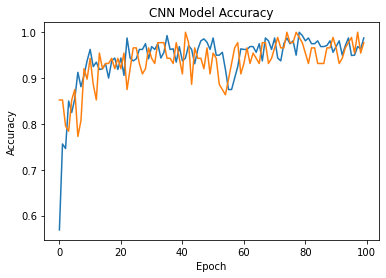

In [75]:
_# Plot training & validation loss values
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
# plt.plot(model_history.history['loss'])
plt.title('CNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
# plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()


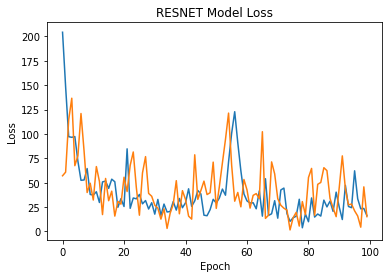

In [76]:
_# Plot training & validation loss values
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('RESNET Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
# plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

In [77]:
# epochs = list(range(0,numOfEpochs))
# plt.plot(model_history.history['accuracy'])
# plt.plot(epochs)
# plt.title('CNN Model accuracy values')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()

In [78]:
# epochs = list(range(0,numOfEpochs))
# plt.plot(model_history.history['loss'])
# plt.plot(epochs)
# plt.title('CNN Model loss values')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()

In [79]:
data_set = 'C:/Users/BS579/Desktop/UNet-TF-new/Classification-Dataset - Cross Validation 4 fold/Fold 1/test'
folders = ['Aedes', 'Culex']

In [80]:
def get_data(data_set_path):
    data = []
    for c in folders:
        path = os.path.join(data_set_path, c)
        
        for img in tqdm(os.listdir(path)):
#             print(os.path.join(path,img))
            try:
                img_arr = cv2.imread(os.path.join(path,img), cv2.IMREAD_COLOR)
#                 img_arr = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                img_resized = cv2.resize(img_arr, (224, 224))
                data.append(img_resized)
            except Exception as e:
                pass
    return np.array(data)

In [81]:
# testImages = get_data(data_set)
# print(len(testImages))
# print(type(testImages))
# print(testImages.shape)

In [82]:
# # evaluate
# test_loss, test_acc = model.evaluate(testImages, testImagesLevel)
# print("Test Loss: {0} - Test Acc: {1}".format(test_loss, test_acc))

In [83]:
# model.predict(test_set)
resss = model.predict(test_set)
x22 = np.max(resss, axis=1)
print(len(test_set))
print(x22[11],resss[11])
print(np.max(resss[11], axis=0))
# np.maximum

4
1.0 [1. 0.]
1.0


In [84]:
print(np.array(tf.argmax(resss, axis=1)))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [85]:
from sklearn.metrics import roc_curve, auc
import glob

Aedes_Count = 0;
test_labels = []
#for directory_path in glob.glob("cell_images/test/*"): 
for directory_path in glob.glob(test_path + "/*"):
    label = directory_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        if(label == 'Aedes'):
            Aedes_Count = Aedes_Count + 1;
            test_labels.append(0)
        else:
            test_labels.append(1)
        
test_labels = np.array(test_labels)

In [65]:
def get_datalevel2():
    datalevel= []
    for i in range(len(test_labels)):
        if(i < Aedes_Count):
            datalevel.append([1,0])
        else:
            datalevel.append([0,1])
    return np.array(datalevel)


In [86]:
testdataLevels = get_datalevel2()
# print(testdataLevels)
y_score = model.predict(test_set)
# preds = y_score[:,1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(testdataLevels[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# print(y_test.ravel(), y_score.ravel())
# # Compute micro-average ROC curve and ROC area
# fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
# roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

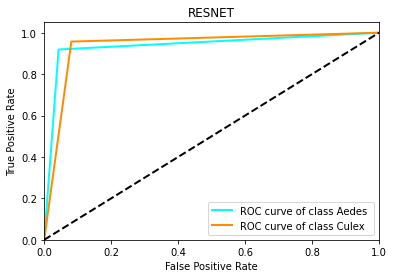

In [87]:
colors = ["aqua", "darkorange"]
classes = ['Aedes','Culex']

plt.figure()
lw = 2
for i in range(2):
    plt.plot(
        fpr[i],
        tpr[i],
        color=colors[i],
        lw=lw,
        label="ROC curve of class {0} ".format(classes[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("RESNET")
plt.legend(loc="lower right")
plt.show()

In [88]:
roc_auc

{0: 0.9380308880308881, 1: 0.9380308880308881}

In [89]:
len(y_score)

107

In [90]:
test_labels_predict = [];
for i in range(len(y_score)):
    if(y_score[i][0] > y_score[i][1]):
        test_labels_predict.append(0)
    else:
        test_labels_predict.append(1)
test_labels_predict = np.array(test_labels_predict)

In [91]:
from sklearn import metrics
confusion = metrics.confusion_matrix(test_labels, test_labels_predict)
print(confusion)

[[34  3]
 [ 3 67]]


In [92]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
SPC = TN / float(TN+FP)
TPR = TP / float(TP+FN)
print('SPC = ', SPC, '\nTPR = ', TPR)

SPC =  0.918918918918919 
TPR =  0.9571428571428572


In [94]:
model.save('resnet50-4.h5')